# Web Graph Demo

Demonstrates the async web search graph and tool.

In [1]:
from lha.config import get_settings

settings = get_settings()
if not settings.tavily_api_key:
    raise ValueError("TAVILY_API_KEY required in .env")

TAVILY_API_KEY: str = settings.tavily_api_key
print("Settings loaded")

Settings loaded


## 1. Setup

In [2]:
from lha.graphs.web import (
    TavilyClient,
    TavilySearchTool,
    build_web_graph,
    expand_query,
)

# Build graph
web_graph = build_web_graph(
    api_key=TAVILY_API_KEY,
    max_results=3,
    search_depth="basic",
)

# Create tool
client = TavilyClient(api_key=TAVILY_API_KEY, max_results=3)
tool = TavilySearchTool(client=client)

print("Graph and tool ready")

Graph and tool ready


## 2. Query Expansion

In [3]:
# expand_query generates multiple related queries from a single topic
topic = "LangGraph human-in-the-loop"
queries = expand_query(topic)

print(f"Expanded '{topic}' into:")
for q in queries:
    print(f"  - {q}")

Expanded 'LangGraph human-in-the-loop' into:
  - LangGraph human-in-the-loop
  - LangGraph human-in-the-loop documentation
  - LangGraph human-in-the-loop examples
  - LangGraph human-in-the-loop best practices 2026
  - LangGraph human-in-the-loop tutorial


## 3. Web Graph - Single Query

In [4]:
# Single question search via graph
result = await web_graph.ainvoke({"question": "What is LangGraph?"})

for r in result["results"]:
    print(f"[{r.score:.2f}] {r.title}")
    print(f"        {r.url}\n")

[0.94] What is LangGraph? - GeeksforGeeks
        https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/

[0.94] What is LangGraph? - IBM
        https://www.ibm.com/think/topics/langgraph

[0.94] LangGraph Tutorial: What Is LangGraph and How to Use It?
        https://www.datacamp.com/tutorial/langgraph-tutorial



## 4. Web Graph - Expanded Query

In [5]:
# Expanded queries - parallel search, deduplicated, sorted by score
topic = "LangGraph state management"
result = await web_graph.ainvoke({"queries": expand_query(topic)})

print(f"Topic: {topic}")
print(f"Found {len(result['results'])} unique results\n")
for r in result["results"][:5]:
    print(f"[{r.score:.2f}] {r.title}")

Topic: LangGraph state management
Found 7 unique results

[1.00] LangGraph Tutorial: Understanding State Management
[0.92] LangGraph Tutorial: Advanced State Management with Extended ...
[0.88] A Powerful Library for State Management in AI Workflows - LinkedIn
[0.87] Next Level Agent State Management with LangGraph | Part 9
[0.84] Mastering LangGraph State Management in 2025 - Sparkco


## 5. TavilySearchTool - Single Query

In [6]:
# Tool returns structured dict for agent use
result = await tool.ainvoke({"query": "LangGraph StateGraph"})

print(f"Results: {len(result['results'])}\n")
r = result["results"][0]
print(f"[{r['score']:.2f}] {r['title']}")
print(f"URL: {r['url']}")
print(f"{r['content'][:200]}...")

Results: 3

[1.00] StateGraph | LangGraph.js API Reference - GitHub Pages
URL: https://langchain-ai.github.io/langgraphjs/reference/classes/langgraph.StateGraph.html
import { type  BaseMessage,  AIMessage,  HumanMessage,} from  "@langchain/core/messages"; import { StateGraph, Annotation } from  "@langchain/langgraph";// Define a state with a single key named "mess...


## 6. TavilySearchTool - Expanded Query

In [7]:
# Expanded search via tool
topic = "LangGraph checkpointing"
result = await tool.ainvoke({"query": expand_query(topic)})

print(f"Topic: {topic}")
print(f"Found {len(result['results'])} unique results\n")
for r in result["results"]:
    print(f"[{r['score']:.2f}] {r['title']}")

Topic: LangGraph checkpointing
Found 8 unique results

[1.00] Mastering LangGraph Checkpointing: Best Practices for 2025
[1.00] Persistence - Docs by LangChain
[1.00] LangGraph: How to persist agent state with checkpointing - LinkedIn
[1.00] LangGraph's checkpoint system solves state loss on failure in AI ...
[0.87] Demystifying LangGraph: A Beginner-Friendly Dive ... - Sakshee Patil
[0.81] Checkpointing | LangChain Reference
[0.80] Built with LangGraph! #17: Checkpoints | by Okan Yenigün - Medium
[0.75] Checkpoints and Human-Computer Interaction in LangGraph


## 7. Graph Visualization

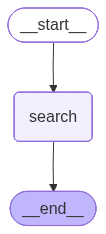

In [8]:
from IPython.display import Image, display

display(Image(web_graph.get_graph().draw_mermaid_png()))